<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-08-18 15:19:53--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf [following]
--2024-08-18 15:19:54--  https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf [following]
--2024-08-18 15:19:54--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm

## 14-1

In [4]:
heights = np.arange(60, 78, 0.1)

## 14-2

In [5]:
np.random.seed(0)
random_fluctuations = np.random.normal(scale=10, size=heights.size)
weights = 4 * heights - 130 + random_fluctuations

## 14-3

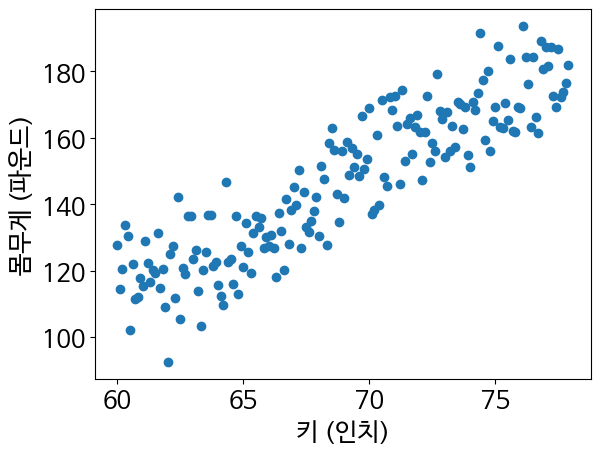

In [6]:
measurements = np.array([heights, weights])
plt.scatter(measurements[0], measurements[1])
plt.xlabel('키 (인치)')
plt.ylabel('몸무게 (파운드)')
plt.show()

## 14-4

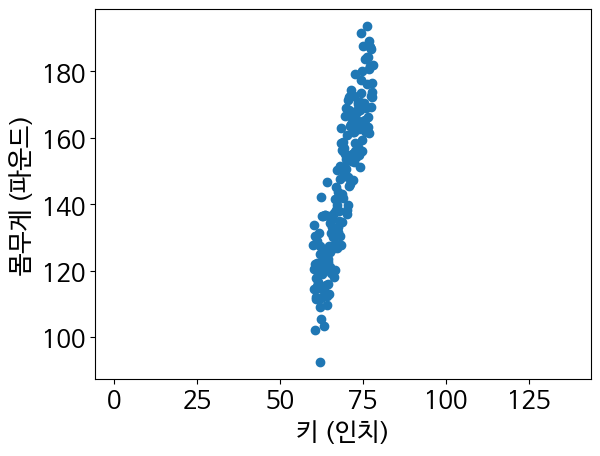

In [7]:
plt.scatter(measurements[0], measurements[1])
plt.xlabel('키 (인치)')
plt.ylabel('몸무게 (파운드)')
plt.axis('equal')
plt.show()

## 14-5

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


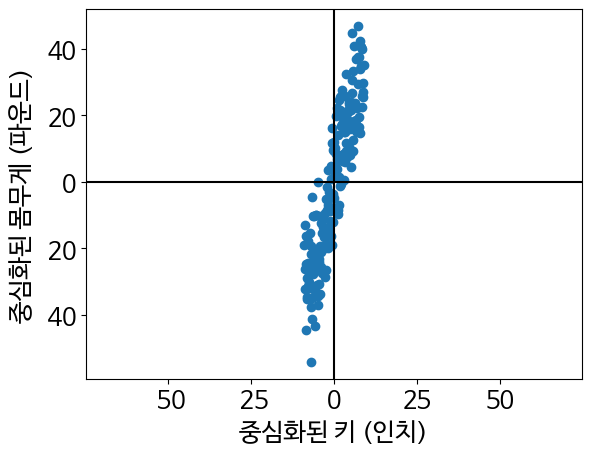

In [8]:
centered_data = np.array([heights - heights.mean(),
weights - weights.mean()])
plt.scatter(centered_data[0], centered_data[1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.xlabel('중심화된 키 (인치)')
plt.ylabel('중심화된 몸무게 (파운드)')
plt.axis('equal')
plt.show()

## 14-6

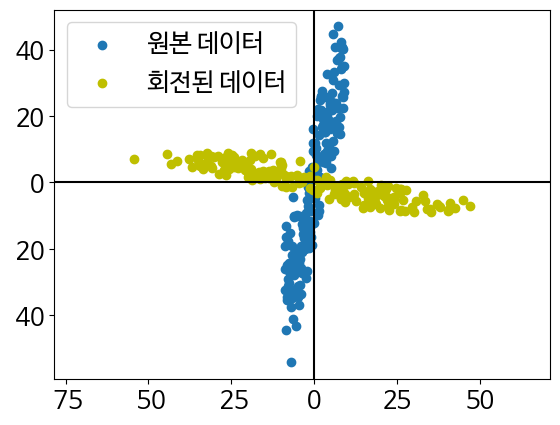

In [9]:
from math import sin, cos
angle = np.radians(-90)
rotation_matrix = np.array([[cos(angle), -sin(angle)],
                         [sin(angle), cos(angle)]])
rotated_data = rotation_matrix @ centered_data
plt.scatter(centered_data[0], centered_data[1], label='원본 데이터')
plt.scatter(rotated_data[0], rotated_data[1], c='y', label='회전된 데이터')
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.legend()
plt.axis('equal')
plt.show()

## 14-7

In [10]:
data_labels = ['unrotated', 'rotated']
data_list = [centered_data, rotated_data]
for data_label, data in zip(data_labels, data_list):
    y_values = data[1]
    penalty = y_values @ y_values / y_values.size
    print(f"{data_label} 데이터에 대한 패널티 점수는 {penalty:.2f}입니다")

unrotated 데이터에 대한 패널티 점수는 519.82입니다
rotated 데이터에 대한 패널티 점수는 27.00입니다


## 14-8

In [11]:
for data_label, data in zip(data_labels, data_list):
    y_var = data[1].var()
    penalty = data[1] @ data[1] / data[0].size
    assert round(y_var, 14) == round(penalty, 14)
    print(f"{data_label} 데이터에 대한 y-축 분산은 {y_var:.2f}입니다")

unrotated 데이터에 대한 y-축 분산은 519.82입니다
rotated 데이터에 대한 y-축 분산은 27.00입니다


## 14-9

In [12]:
for data_label, data in zip(data_labels, data_list):
    x_var = data[0].var()
    print(f"{data_label} 데이터에 대한 x-축 분산은 {x_var:.2f}입니다")

unrotated 데이터에 대한 x-축 분산은 27.00입니다
rotated 데이터에 대한 x-축 분산은 519.82입니다


## 14-10

In [13]:
total_variance = centered_data[0].var() + centered_data[1].var()
assert total_variance == rotated_data[0].var() + rotated_data[1].var()

## 14-11

In [14]:
for data_label, data in zip(data_labels, data_list):
    percent_x_axis_var = 100 * data[0].var() / total_variance
    percent_y_axis_var = 100 * data[1].var() / total_variance
    print(f"{data_label} 데이터에서, 총 분산 중 {percent_x_axis_var:.2f}%는 "
         "x-축에 걸쳐 분포되어 있습니다")
    print(f"총 분산 중 나머지 {percent_y_axis_var:.2f}%는 "
         "y-축에 걸쳐 분포되어 있습니다\n")

unrotated 데이터에서, 총 분산 중 4.94%는 x-축에 걸쳐 분포되어 있습니다
총 분산 중 나머지 95.06%는 y-축에 걸쳐 분포되어 있습니다

rotated 데이터에서, 총 분산 중 95.06%는 x-축에 걸쳐 분포되어 있습니다
총 분산 중 나머지 4.94%는 y-축에 걸쳐 분포되어 있습니다



## 14-12

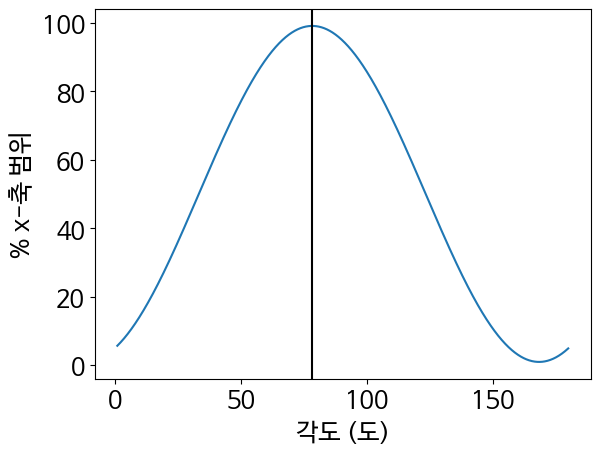

수평 분산은 78.3도 회전 후 약 541로 최대화되었습니다
회전은 총 분산의 99.08%를 x-축으로 분포시킵니다


In [15]:
def rotate(angle, data=centered_data):
    angle = np.radians(-angle)
    rotation_matrix = np.array([[cos(angle), -sin(angle)],
                             [sin(angle), cos(angle)]])
    return rotation_matrix @ data

angles = np.arange(1, 180, 0.1)
x_variances = [(rotate(angle)[0].var()) for angle in angles]

percent_x_variances = 100 * np.array(x_variances) / total_variance
optimal_index = np.argmax(percent_x_variances)
optimal_angle = angles[optimal_index]
plt.plot(angles, percent_x_variances)
plt.axvline(optimal_angle, c='k')
plt.xlabel('각도 (도)')
plt.ylabel('% x-축 범위')
plt.show()

max_coverage = percent_x_variances[optimal_index]
max_x_var = x_variances[optimal_index]

print(f"수평 분산은 {optimal_angle:.1f}도 회전 후 "
     f"약 {int(max_x_var)}로 최대화되었습니다")
print(f"회전은 총 분산의 {max_coverage:.2f}%를 x-축으로 분포시킵니다")

## 14-13

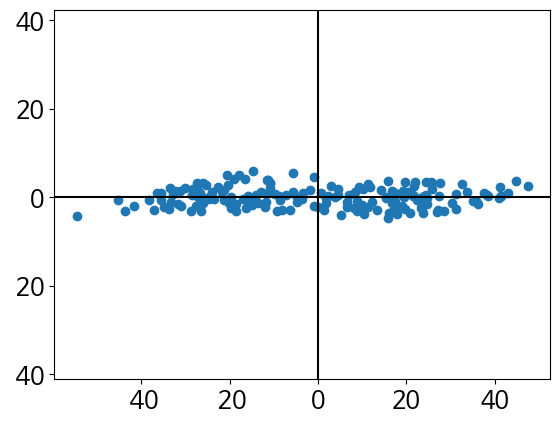

In [16]:
best_rotated_data = rotate(optimal_angle)
plt.scatter(best_rotated_data[0], best_rotated_data[1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.axis('equal')
plt.show()

## 14-14

In [18]:
x_values = best_rotated_data[0]
sorted_x_values = sorted(x_values)
cluster_size = int(x_values.size / 3)
small_cutoff = max(sorted_x_values[:cluster_size])
large_cutoff = min(sorted_x_values[-cluster_size:])
print(f"{small_cutoff:.2f}의 1D 임곗값은 소형과 중형 의류 고객을 분리합니다")
print(f"{large_cutoff:.2f}의 1D 임곗값은 중형과 대형 의류 고객을 분리합니다")

-14.61의 1D 임곗값은 소형과 중형 의류 고객을 분리합니다
15.80의 1D 임곗값은 중형과 대형 의류 고객을 분리합니다


## 14-15

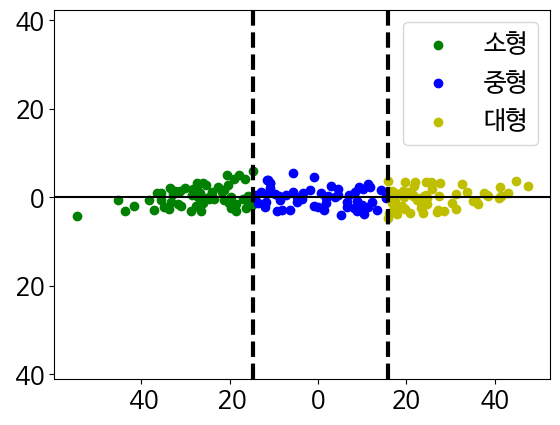

In [20]:
def plot_customer_segments(horizontal_2d_data):
    small, medium, large = [], [], []
    cluster_labels = ['소형', '중형', '대형']
    for x_value, y_value in horizontal_2d_data.T:
        if x_value <= small_cutoff:
            small.append([x_value, y_value])
        elif small_cutoff < x_value < large_cutoff:
            medium.append([x_value, y_value])
        else:
            large.append([x_value, y_value])

    for i, cluster in enumerate([small, medium, large]):
        cluster_x_values, cluster_y_values = np.array(cluster).T
        plt.scatter(cluster_x_values, cluster_y_values,
                 color=['g', 'b', 'y'][i],
                 label=cluster_labels[i])

    plt.axhline(0, c='black')
    plt.axvline(large_cutoff, c='black', linewidth=3, linestyle='--')
    plt.axvline(small_cutoff, c='black', linewidth=3, linestyle='--')
    plt.axis('equal')
    plt.legend()
    plt.show()

plot_customer_segments(best_rotated_data)

## 14-16

In [21]:
zero_y_values = np.zeros(x_values.size)
reproduced_data = rotate(-optimal_angle, data=[x_values, zero_y_values])

## 14-17

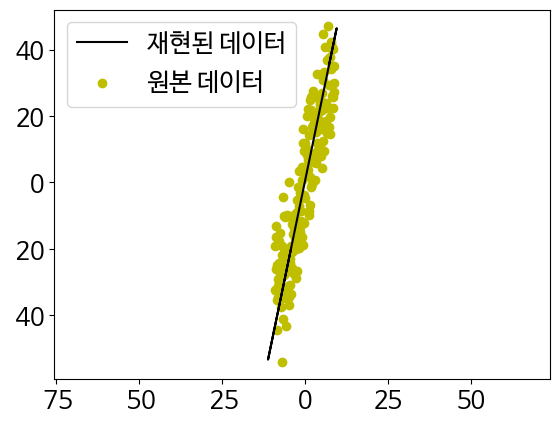

In [22]:
plt.plot(reproduced_data[0], reproduced_data[1], c='k', label='재현된 데이터')
plt.scatter(centered_data[0], centered_data[1], c='y', label='원본 데이터')
plt.axis('equal')
plt.legend()
plt.show()

## 14-18

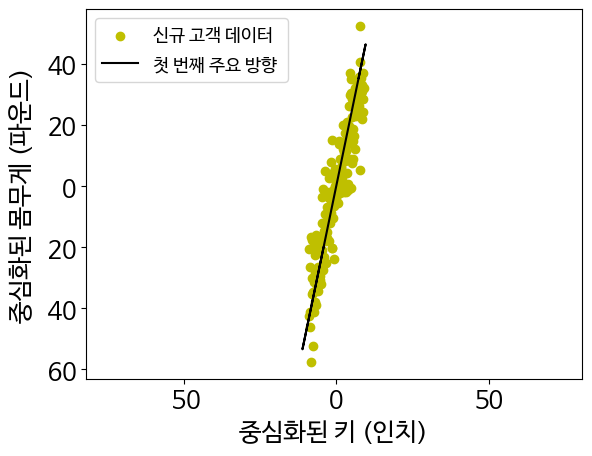

In [25]:
np.random.seed(1)
new_heights = np.arange(60, 78, .11)
random_fluctuations = np.random.normal(scale=10, size=new_heights.size)
new_weights = 4 * new_heights - 130 + random_fluctuations
new_centered_data = np.array([new_heights - heights.mean(),
                            new_weights - weights.mean()])
plt.scatter(new_centered_data[0], new_centered_data[1], c='y', label='신규 고객 데이터')
plt.plot(reproduced_data[0], reproduced_data[1], c='k', label='첫 번째 주요 방향 ')
plt.xlabel('중심화된 키 (인치)')
plt.ylabel('중심화된 몸무게 (파운드)')
plt.axis('equal')
plt.legend(loc='upper left', fontsize=13)

## 14-19

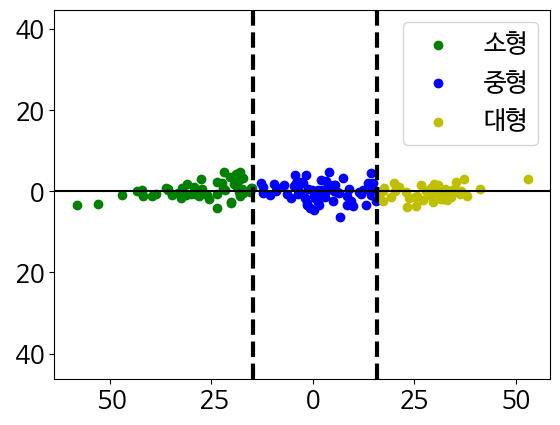

In [26]:
new_horizontal_data = rotate(optimal_angle, data=new_centered_data)
plot_customer_segments(new_horizontal_data)

## 14-20

In [27]:
from sklearn.decomposition import PCA

## 14-21

In [28]:
pca_object = PCA()

## 14-22

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


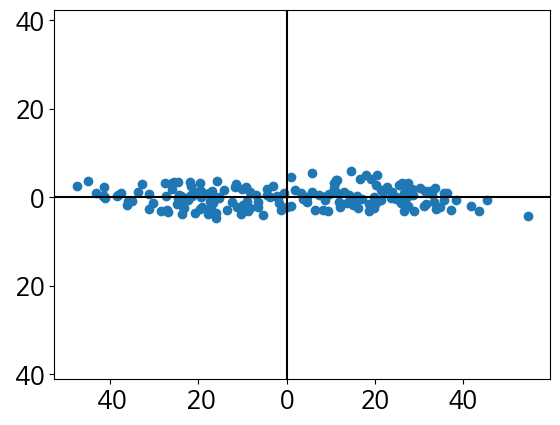

In [29]:
pca_transformed_data = pca_object.fit_transform(measurements.T)
plt.scatter(pca_transformed_data[:,0], pca_transformed_data[:,1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.axis('equal')
plt.show()

## 14-23

In [30]:
percent_variance_coverages = 100 * pca_object.explained_variance_ratio_
x_axis_coverage, y_axis_coverage = percent_variance_coverages
print(f"PCA 출력의 x-축은 총 분산의 {x_axis_coverage:.2f}%를 포함합니다")

PCA 출력의 x-축은 총 분산의 99.08%를 포함합니다


## 14-24

In [33]:
first_pc = pca_object.components_[0]
magnitude = norm(first_pc)
print(f"벡터 {first_pc}는 총 분산의 {x_axis_coverage:.2f}%를 포함하는 방향을 가리킵니다")
print(f"벡터의 크기는 {magnitude}입니다")

벡터 [-0.20223994 -0.979336  ]는 총 분산의 99.08%를 포함하는 방향을 가리킵니다
벡터의 크기는 1.0입니다


## 14-25

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


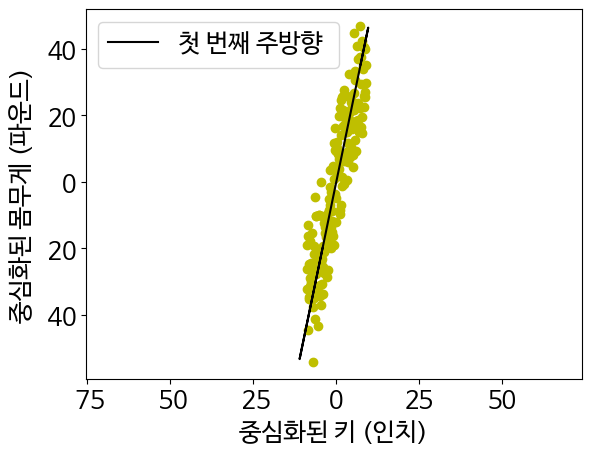

In [34]:
def plot_stretched_vector(v, **kwargs):
    plt.plot([-50 * v[0], 50 * v[0]], [-50 * v[1], 50 * v[1]], **kwargs)

plt.plot(reproduced_data[0], reproduced_data[1], c='k', label='첫 번째 주방향 ')
plt.scatter(centered_data[0], centered_data[1], c='y')
plt.xlabel('중심화된 키 (인치)')
plt.ylabel('중심화된 몸무게 (파운드)')
plt.axis('equal')
plt.legend()
plt.show()

## 14-26

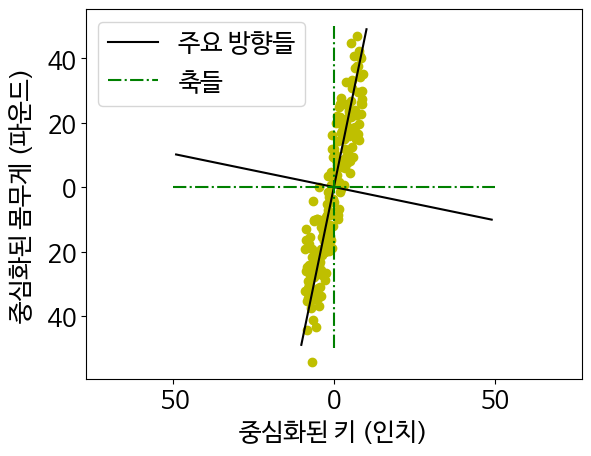

In [35]:
principal_components = pca_object.components_
for i, pc in enumerate(principal_components):
    plot_stretched_vector(pc, c='k', label='주요 방향들' if i == 0 else None)

for i, axis_vector in enumerate([np.array([0, 1]), np.array([1, 0])]):
    plot_stretched_vector(axis_vector, c='g', linestyle='-.',
                        label='축들' if i == 0 else None)

plt.scatter(centered_data[0], centered_data[1], c='y')
plt.xlabel('중심화된 키 (인치)')
plt.ylabel('중심화된 몸무게 (파운드)')
plt.axis('equal')
plt.legend()
plt.show()

## 14-27

In [36]:
projections = principal_components @ centered_data
assert np.allclose(pca_transformed_data.T, projections)

## 14-28

In [37]:
from sklearn.datasets import load_iris
flower_data = load_iris()
flower_measurements = flower_data['data']
num_flowers, num_measurements = flower_measurements.shape
print(f"{num_flowers} 송이의 꽃들이 측정되었습니다")
print(f"{num_measurements} 개의 측정치가 모든 꽃들에 대해 기록되었습니다 ")
print(f"첫 번째 꽃의 측정치는 다음과 같습니다 (센티미터): {flower_measurements[0]}")

150 송이의 꽃들이 측정되었습니다
4 개의 측정치가 모든 꽃들에 대해 기록되었습니다 
첫 번째 꽃의 측정치는 다음과 같습니다 (센티미터): [5.1 3.5 1.4 0.2]


## 14-29

In [38]:
pca_object_2D = PCA(n_components=2)
transformed_data_2D = pca_object_2D.fit_transform(flower_measurements)

## 14-30

In [39]:
row_count, column_count = transformed_data_2D.shape
print(f"행렬은 {row_count}개의 열을 포함하며, 각 열은 한 송이 꽃에 해당합니다")
print(f"또한 {column_count}개의 행을 포함하며, 각 {column_count} 차원에 해당합니다")

행렬은 150개의 열을 포함하며, 각 열은 한 송이 꽃에 해당합니다
또한 2개의 행을 포함하며, 각 2 차원에 해당합니다


## 14-31

In [40]:
def print_2D_variance_coverage(pca_object):
    percent_var_coverages = 100 * pca_object.explained_variance_ratio_
    x_axis_coverage, y_axis_coverage = percent_var_coverages
    total_coverage = x_axis_coverage + y_axis_coverage
    print(f"x-축은 총 분산의 {x_axis_coverage:.2f}%를 포함합니다")
    print(f"y-축은 총 분산의 {y_axis_coverage:.2f}%를 포함합니다 ")
    print(f"두 축 모두 함께 총 분산의 {total_coverage:.2f}%를 포함합니다")

print_2D_variance_coverage(pca_object_2D)

x-축은 총 분산의 92.46%를 포함합니다
y-축은 총 분산의 5.31%를 포함합니다 
두 축 모두 함께 총 분산의 97.77%를 포함합니다


## 14-32

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


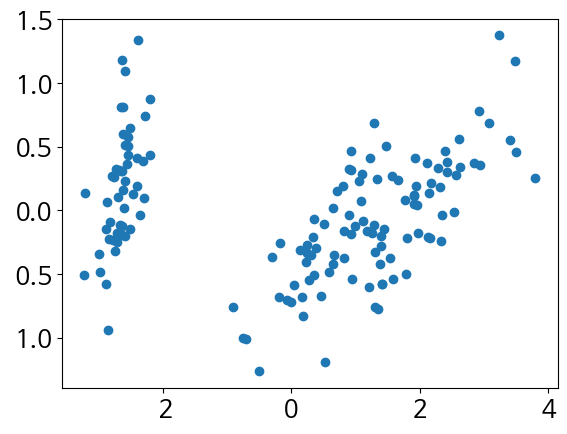

In [41]:
plt.scatter(transformed_data_2D[:,0], transformed_data_2D[:,1])
plt.show()

## 14-33

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


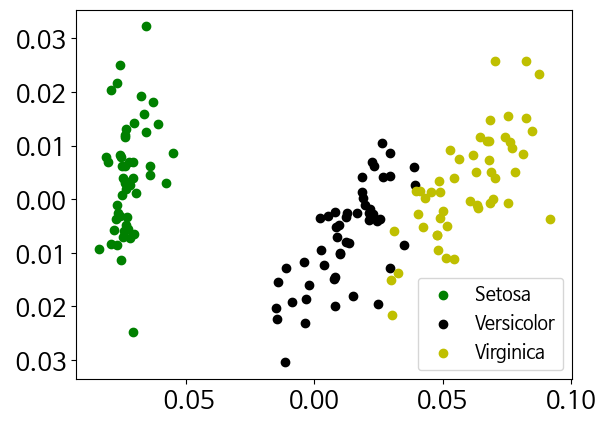

In [79]:
def visualize_flower_data(dim_reduced_data, loc="lower right"):
    species_names = flower_data['target_names']
    for i, species in enumerate(species_names):
        species_data = np.array([dim_reduced_data[j]
                              for j in range(dim_reduced_data.shape[0])
                              if flower_data['target'][j] == i]).T
        plt.scatter(species_data[0], species_data[1], label=species.title(),
                 color=['g', 'k', 'y'][i])
    plt.legend(loc=loc, fontsize=13)
    plt.show()

visualize_flower_data(transformed_data_2D)

## 14-34

In [45]:
def detect_setosa(flower_sample):
    centered_sample = flower_sample - pca_object_2D.mean_
    projection = pca_object_2D.components_[0] @ centered_sample
    if projection < -2:
        print("이 샘플은 Setosa일 가능성이 높습니다 ")
    else:
        print("이 샘플은 Setosa가 아닙니다 ")

new_flower_sample = np.array([4.8, 3.7, 1.2, 0.24])
detect_setosa(new_flower_sample)

이 샘플은 Setosa일 가능성이 높습니다 


## 14-35

In [48]:
first_axis_var = flower_measurements[:,0].var()
print(f"첫 번째 축의 분산은 {first_axis_var:.2f}입니다")

flower_measurements[:,0] *= 10
first_axis_var = flower_measurements[:,0].var()
print("측정치를 센티미터(cm)에서 밀리미터(mm)로 변환했습니다.\n이제 분산은 "
     f"{first_axis_var:.2f}와 같습니다")

첫 번째 축의 분산은 68.11입니다
측정치를 센티미터(cm)에서 밀리미터(mm)로 변환했습니다.
이제 분산은 6811.22와 같습니다


## 14-36

In [49]:
pca_object_2D.fit_transform(flower_measurements)
print_2D_variance_coverage(pca_object_2D)

x-축은 총 분산의 99.98%를 포함합니다
y-축은 총 분산의 0.01%를 포함합니다 
두 축 모두 함께 총 분산의 100.00%를 포함합니다


## 14-37

In [50]:
for i in range(flower_measurements.shape[1]):
    flower_measurements[:,i] /= norm(flower_measurements[:,i])

transformed_data_2D = pca_object_2D.fit_transform(flower_measurements)
print_2D_variance_coverage(pca_object_2D)

x-축은 총 분산의 94.00%를 포함합니다
y-축은 총 분산의 3.67%를 포함합니다 
두 축 모두 함께 총 분산의 97.67%를 포함합니다


## 14-38

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


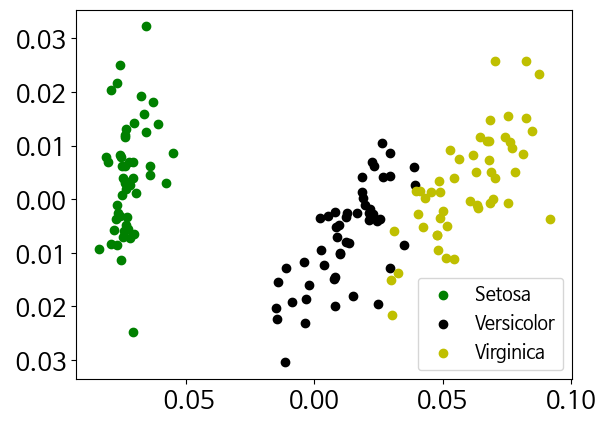

In [51]:
visualize_flower_data(transformed_data_2D)

## 14-39

In [52]:
data = np.array([1 + 1e-3, 1 - 1e-3])
mean = data.mean()
assert mean == 1
centralized_data = data - 2 * [mean]
assert centralized_data.mean() != 0
print(f"실제 평균은 {centralized_data.mean()}와 같습니다")

실제 평균은 -5.551115123125783e-17와 같습니다


## 14-40

In [53]:
cov_matrix = centered_data @ centered_data.T / centered_data.shape[1]
print(f"공분산 행렬:\n {cov_matrix}")
for i in range(centered_data.shape[0]):
    variance = cov_matrix[i][i]
    assert round(variance, 10) == round(centered_data[i].var(), 10)

공분산 행렬:
 [[ 26.99916667 106.30456732]
 [106.30456732 519.8206294 ]]


## 14-41

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


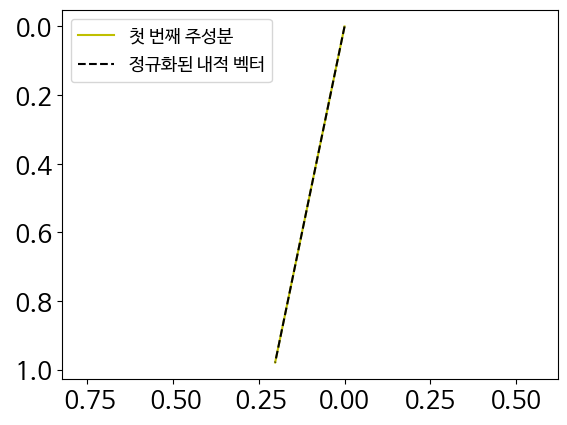

In [56]:
def plot_vector(vector, **kwargs):
    plt.plot([0, vector[0]], [0, vector[1]], **kwargs)

plot_vector(first_pc, c='y', label='첫 번째 주성분')
product_vector = cov_matrix @ first_pc
product_vector /= norm(product_vector)
plot_vector(product_vector, c='k', linestyle='--', label='정규화된 내적 벡터')
plt.legend(loc="upper left", fontsize=13)
plt.axis('equal')
plt.show()

## 14-42

In [57]:
product_vector2 = cov_matrix @ product_vector
product_vector2 /= norm(product_vector2)
cosine_similarity = product_vector @ product_vector2
angle = np.degrees(np.arccos(cosine_similarity))
print(f"벡터 사이의 각도는 {angle:.2f}도와 같습니다")

벡터 사이의 각도는 0.00도와 같습니다


## 14-43

In [58]:
new_magnitude = norm(cov_matrix @ first_pc)
print("곱셈은 첫 번째 주 성분을 "
     f"약 {new_magnitude:.1f} 단위만큼 늘렸습니다.")

곱셈은 첫 번째 주 성분을 약 541.8 단위만큼 늘렸습니다.


## 14-44

In [60]:
variance = (centered_data.T @ first_pc).var()
direction1_var = projections[0].var()
assert round(variance, 10) == round(direction1_var, 10)
print(f"첫 번째 주방향을 따르는 분산은 약 {variance:.1f}입니다")

첫 번째 주방향을 따르는 분산은 약 541.8입니다


## 14-45

In [61]:
np.random.seed(0)
random_vector = np.random.random(size=2)
random_vector /= norm(random_vector)

## 14-46

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


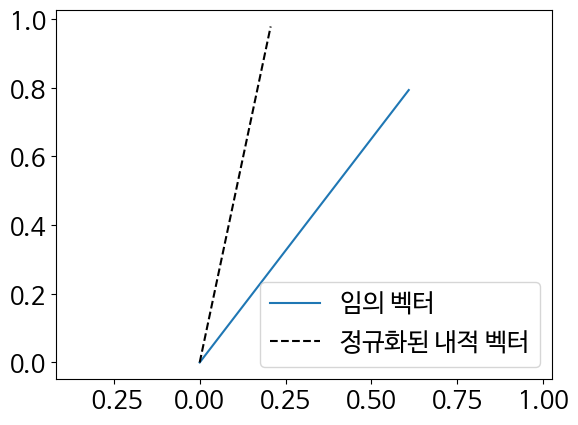

In [62]:
product_vector = cov_matrix @ random_vector
product_vector /= norm(product_vector)

plt.plot([0, random_vector[0]], [0, random_vector[1]], label='임의 벡터')
plt.plot([0, product_vector[0]], [0, product_vector[1]], linestyle='--',
       c='k', label='정규화된 내적 벡터')
plt.legend()
plt.axis('equal')
plt.show()

## 14-47

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


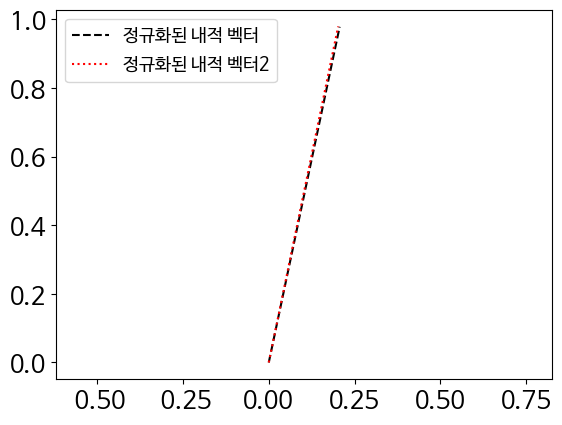

In [64]:
product_vector2 = cov_matrix @ product_vector
product_vector2 /= norm(product_vector2)

plt.plot([0, product_vector[0]], [0, product_vector[1]], linestyle='--',
       c='k', label='정규화된 내적 벡터')
plt.plot([0, product_vector2[0]], [0, product_vector2[1]], linestyle=':',
       c='r', label='정규화된 내적 벡터2')
plt.legend(loc="upper left", fontsize=13)
plt.axis('equal')
plt.show()

## 14-48

In [65]:
np.random.seed(0)
def power_iteration(matrix):
    random_vector = np.random.random(size=matrix.shape[0])
    random_vector = random_vector / norm(random_vector)
    old_rotated_vector = random_vector
    for _ in range(10):
        rotated_vector = matrix @ old_rotated_vector
        rotated_vector = rotated_vector / norm(rotated_vector)
        old_rotated_vector = rotated_vector

    eigenvector = rotated_vector
    eigenvalue = norm(matrix @ eigenvector)
    return eigenvector, eigenvalue

eigenvector, eigenvalue = power_iteration(cov_matrix)
print(f"추출된 고유벡터는 {eigenvector}입니다")
print(f"해당 고유벡터의 값은 약 {eigenvalue: .1f}입니다")

추출된 고유벡터는 [0.20223994 0.979336  ]입니다
해당 고유벡터의 값은 약  541.8입니다


## 14-49

In [66]:
outer_product = np.outer(eigenvector, eigenvector)
for i in range(eigenvector.size):
    for j in range(eigenvector.size):
        assert outer_product[i][j] == eigenvector[i] * eigenvector[j]

## 14-50

In [67]:
deflated_matrix = cov_matrix - eigenvalue * outer_product

## 14-51

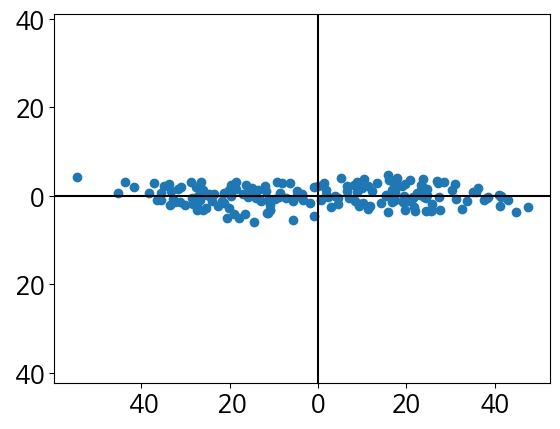

In [68]:
np.random.seed(0)
next_eigenvector, _ = power_iteration(deflated_matrix)
components = np.array([eigenvector, next_eigenvector])
projections = components @ centered_data
plt.scatter(projections[0], projections[1])
plt.axhline(0, c='black')
plt.axvline(0, c='black')
plt.axis('equal')
plt.show()

## 14-52

In [70]:
def find_top_principal_components(centered_matrix, k=2):
    cov_matrix = centered_matrix @ centered_matrix.T
    cov_matrix /= centered_matrix[1].size
    return find_top_eigenvectors(cov_matrix, k=k)

def find_top_eigenvectors(matrix, k=2):
    matrix = matrix.copy()
    eigenvectors = []
    for _ in range(k):
        eigenvector, eigenvalue = power_iteration(matrix)
        eigenvectors.append(eigenvector)
        matrix -= eigenvalue * np.outer(eigenvector, eigenvector)

    return np.array(eigenvectors)

## 14-53

In [71]:
def reduce_dimensions(data, k=2, centralize_data=True):
    data = data.T.copy()
    if centralize_data:
        for i in range(data.shape[0]):
            data[i] -= data[i].mean()

    principal_components = find_top_principal_components(data)
    return (principal_components @ data).T

## 14-54

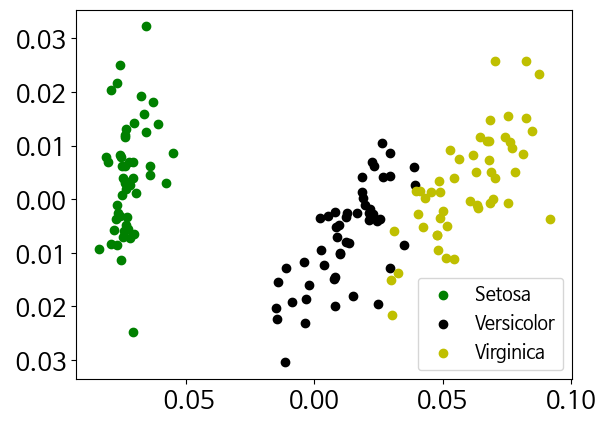

In [72]:
np.random.seed(0)
dim_reduced_data = reduce_dimensions(flower_measurements)
visualize_flower_data(dim_reduced_data)

## 14-55

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


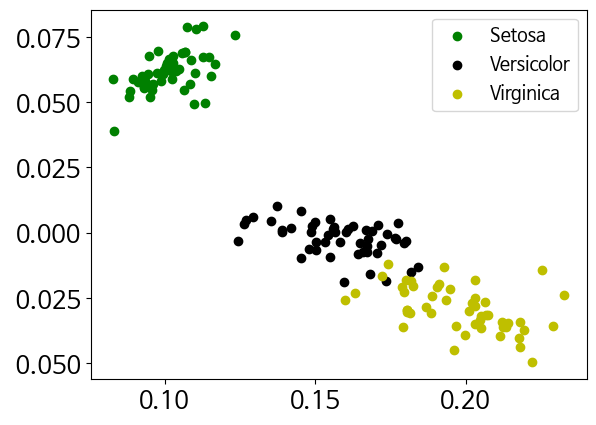

In [80]:
np.random.seed(3)
dim_reduced_data = reduce_dimensions(flower_measurements,
                                     centralize_data=False)
visualize_flower_data(dim_reduced_data, loc="upper right")

## 14-56

In [76]:
variances = [sum(data[:,i].var() for i in range(data.shape[1]))
           for data in [dim_reduced_data, flower_measurements]]
dim_reduced_var, total_var = variances
percent_coverege = 100 * dim_reduced_var / total_var
print(f"그래프는 전체 분산의 {percent_coverege:.2f}% 를 덮습니다.")

그래프는 전체 분산의 97.29% 를 덮습니다.


## 14-57

In [77]:
from sklearn.decomposition import TruncatedSVD

## 14-58

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


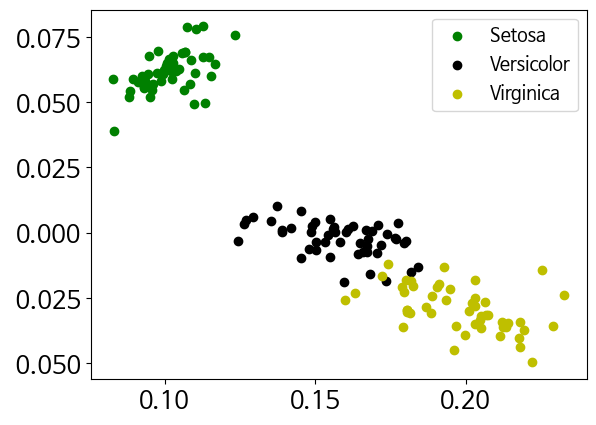

In [81]:
svd_object = TruncatedSVD(n_components=2)
svd_transformed_data = svd_object.fit_transform(flower_measurements)
visualize_flower_data(svd_transformed_data, loc="upper right")

## 14-59

In [82]:
percent_variance_coverages = 100 * svd_object.explained_variance_ratio_
x_axis_coverage, y_axis_coverage = percent_variance_coverages
total_2d_coverage = x_axis_coverage + y_axis_coverage
print(f"사이킷런의 SVD 출력은 총 분산의 {total_2d_coverage:.2f}%를 포함합니다")

사이킷런의 SVD 출력은 총 분산의 97.29%를 포함합니다
